In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
#pip install seaborn

In [4]:
df = pd.read_csv("Fraud Detection Dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [5]:
df.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [6]:
df.shape

(51000, 12)

In [7]:
df.size

612000

In [8]:
print("Dataset Overview:")
print('-'*30)
print('')
df.info()

Dataset Overview:
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent       

In [9]:
for i in df.columns:
  print(df[i].value_counts(),i)
  print('\n')

Transaction_ID
T21614    2
T10897    2
T12008    2
T1004     2
T5        2
         ..
T49996    1
T49997    1
T49998    1
T49999    1
T50000    1
Name: count, Length: 50000, dtype: int64 Transaction_ID


User_ID
3134    28
1018    27
2573    26
4534    26
3773    26
        ..
2653     3
1423     3
3238     3
4378     3
1543     2
Name: count, Length: 4000, dtype: int64 User_ID


Transaction_Amount
49997.80    508
3562.91       4
1747.31       4
2748.08       4
495.14        4
           ... 
623.00        1
1646.54       1
2395.02       1
857.66        1
4392.68       1
Name: count, Length: 44821, dtype: int64 Transaction_Amount


Transaction_Type
Bill Payment       10340
Bank Transfer      10276
ATM Withdrawal     10164
POS Payment        10126
Online Purchase    10094
Name: count, dtype: int64 Transaction_Type


Time_of_Transaction
18.0    2112
13.0    2087
15.0    2076
3.0     2071
17.0    2060
0.0     2045
5.0     2036
4.0     2035
11.0    2034
16.0    2032
8.0     2026
1.0     2

In [10]:
for i in df.columns:
  print(df[i].unique(),i)
  print('\n')

['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000'] Transaction_ID


[4174 4507 1860 ... 4616 2261 4210] User_ID


[1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43] Transaction_Amount


['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase'] Transaction_Type


[16. 13. nan 15. 19.  2.  3. 20.  0. 12. 21. 14.  7.  4. 17. 10.  5.  8.
 11. 18.  1. 22.  9.  6. 23.] Time_of_Transaction


['Tablet' 'Mobile' 'Desktop' nan 'Unknown Device'] Device_Used


['San Francisco' 'New York' nan 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle'] Location


[0 4 3 2 1] Previous_Fraudulent_Transactions


[119  79 115   3  57  96   6  13 110  66   4  68  25 113  52  65  21  61
  22  43   7 103   8  71  63  99  81  82   2  85  14  31 108 116  15  51
  46  94  93  70  10   1  58 112  41  27  19  35  18 106  29 109  16  74
  28 107  78  44  77  40  20  11  50  45 114  37  48  30  89   9 104  67
 100 117  47  38  86  34  80  90   5  91  42  83  49 102  54  12  72  69
  23

In [11]:
print("Summary Statistics:")
print('-'*30)
print('')
df.describe()

Summary Statistics:
------------------------------



,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


Handling Missing Values

---



In [12]:
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

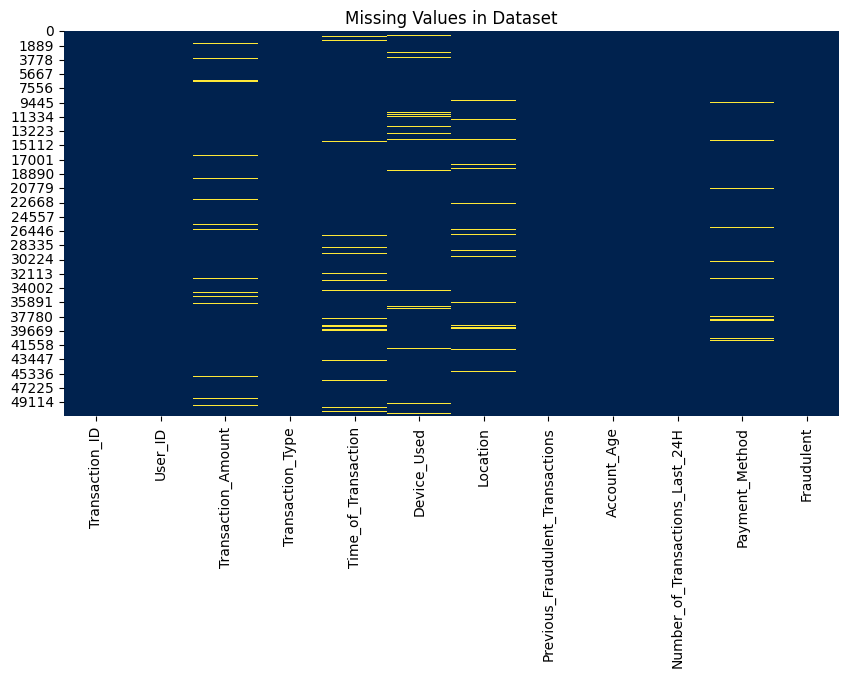

In [13]:
# Plot missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values in Dataset")
plt.show()

In [14]:
# Fill missing numerical values with median
df["Transaction_Amount"].fillna(df["Transaction_Amount"].median(), inplace=True)
df["Time_of_Transaction"].fillna(df["Time_of_Transaction"].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_18516\498051360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transaction_Amount"].fillna(df["Transaction_Amount"].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18516\498051360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [15]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ["Device_Used", "Location", "Payment_Method"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [16]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                51000 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               51000 non-null  float64
 5   Device_Used                       51000 non-null  object 
 6   Location                          51000 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    51000 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [18]:
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,12.0,Mobile,Unknown,3,115,9,Unknown,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [19]:
fraudulent_df = df[df.Fraudulent == 1]

df_no_duplicates = fraudulent_df.drop_duplicates(subset=fraudulent_df.columns.difference(['Fraudulent']))
df_final = pd.concat([df[df.Fraudulent == 0], df_no_duplicates])


In [20]:
df.duplicated().sum()

np.int64(881)

In [21]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50000,T33554,2669,2425.71,Bank Transfer,14.0,Tablet,Seattle,2,40,7,UPI,0
50001,T9428,1001,2448.53,Bank Transfer,19.0,Mobile,San Francisco,4,7,3,Unknown,0
50002,T200,3790,4429.89,ATM Withdrawal,17.0,Unknown,Miami,1,39,6,UPI,1
50003,T12448,1743,108.00,ATM Withdrawal,15.0,Tablet,Los Angeles,3,67,9,Credit Card,0
50004,T39490,4329,2320.30,ATM Withdrawal,4.0,Desktop,Los Angeles,3,12,10,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50993,T5873,4911,3613.59,Online Purchase,11.0,Tablet,New York,3,58,7,Net Banking,0
50994,T48244,4842,1587.84,POS Payment,10.0,Tablet,New York,1,94,6,UPI,0
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1


In [22]:
# analysing duplicates contains fraud cases

duplicate_fraud_rows = df[df.duplicated() & (df["Fraudulent"] == 1)]
duplicate_fraud_rows

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50002,T200,3790,4429.89,ATM Withdrawal,17.0,Unknown,Miami,1,39,6,UPI,1
50016,T15178,3546,147.17,POS Payment,20.0,Desktop,Los Angeles,3,2,14,UPI,1
50029,T33110,4954,3545.68,ATM Withdrawal,0.0,Tablet,Seattle,1,13,8,UPI,1
50049,T17524,4272,871.16,Bill Payment,21.0,Mobile,New York,4,101,10,Net Banking,1
50089,T5634,4576,4910.33,Bill Payment,19.0,Desktop,Boston,1,95,14,Net Banking,1
50091,T48064,3157,1348.48,Online Purchase,19.0,Tablet,New York,0,54,12,Credit Card,1
50100,T10431,4020,4560.07,Bank Transfer,12.0,Tablet,Miami,0,64,9,UPI,1
50119,T44234,2223,629.85,Bank Transfer,10.0,Mobile,New York,2,40,9,Net Banking,1
50146,T41164,2704,510.90,ATM Withdrawal,17.0,Mobile,Los Angeles,3,86,7,Credit Card,1
50158,T8894,4891,2901.98,Bank Transfer,20.0,Tablet,Miami,3,59,14,UPI,1


In [23]:
# Count of duplicate rows and fraudulent duplicates
duplicate_count = duplicate_rows.shape[0]
fraud_duplicate_count = duplicate_fraud_rows.shape[0]

print(f"Total duplicate rows: {duplicate_count}")
print(f"Total fraudulent duplicate rows: {fraud_duplicate_count}")

Total duplicate rows: 881
Total fraudulent duplicate rows: 43


In [24]:
# Remove duplicate non-fraudulent rows but keep duplicates for fraud cases
df_cleaned = df[~df.duplicated() | (df["Fraudulent"] == 1)]
df_cleaned

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,12.0,Mobile,Unknown,3,115,9,Unknown,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50981,T15074,3212,819.70,Bank Transfer,20.0,Tablet,Boston,0,67,4,Credit Card,1
50985,T39758,2029,544.53,Bank Transfer,14.0,Unknown Device,Chicago,4,59,12,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0


In [25]:
# Check new duplicate count after filtering
new_duplicate_count = df_cleaned.duplicated().sum()
new_duplicate_count

np.int64(43)

In [26]:
#pip install scikit-learn

In [27]:
#Creating New Features

df_cleaned["Transaction_Frequency"] = df_cleaned.groupby("User_ID")["Transaction_ID"].transform('count')
df_cleaned["Amount_Per_Transaction_Age"] = df_cleaned["Transaction_Amount"] / (df_cleaned["Account_Age"] + 1)


C:\Users\user\AppData\Local\Temp\ipykernel_18516\305590118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Transaction_Frequency"] = df_cleaned.groupby("User_ID")["Transaction_ID"].transform('count')
C:\Users\user\AppData\Local\Temp\ipykernel_18516\305590118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Amount_Per_Transaction_Age"] = df_cleaned["Transaction_Amount"] / (df_cleaned["Account_Age"] + 1)


In [28]:
high_risk_locations = ["Miami", "New York", "Los Angeles", "Chicago"]
df_cleaned["High_Risk_Location"] = df_cleaned["Location"].apply(lambda x: 1 if x in high_risk_locations else 0)


C:\Users\user\AppData\Local\Temp\ipykernel_18516\1858470311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["High_Risk_Location"] = df_cleaned["Location"].apply(lambda x: 1 if x in high_risk_locations else 0)


In [29]:
fraud_rates = df.groupby("Location")["Fraudulent"].mean()
high_risk_threshold = fraud_rates.quantile(0.75)  # Top 25% fraud locations
df_cleaned["High_Risk_Location"] = df_cleaned["Location"].map(lambda x: 1 if fraud_rates.get(x, 0) >= high_risk_threshold else 0)


C:\Users\user\AppData\Local\Temp\ipykernel_18516\1928303477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["High_Risk_Location"] = df_cleaned["Location"].map(lambda x: 1 if fraud_rates.get(x, 0) >= high_risk_threshold else 0)


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_cleaned[["Transaction_Amount", "Account_Age", "Transaction_Frequency", "Amount_Per_Transaction_Age"]] = scaler.fit_transform(
    df_cleaned[["Transaction_Amount", "Account_Age", "Transaction_Frequency", "Amount_Per_Transaction_Age"]]
)

C:\Users\user\AppData\Local\Temp\ipykernel_18516\1004073964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[["Transaction_Amount", "Account_Age", "Transaction_Frequency", "Amount_Per_Transaction_Age"]] = scaler.fit_transform(


In [32]:
df_cleaned

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Transaction_Frequency,Amount_Per_Transaction_Age,High_Risk_Location
0,T1,4174,0.025758,ATM Withdrawal,16.0,Tablet,San Francisco,0,1.000000,13,Debit Card,0,0.60,0.000429,0
1,T2,4507,0.030995,ATM Withdrawal,13.0,Mobile,New York,4,0.661017,3,Credit Card,0,0.40,0.000775,0
2,T3,1860,0.047807,ATM Withdrawal,12.0,Mobile,Unknown,3,0.966102,9,Unknown,0,0.32,0.000824,0
3,T4,2294,0.001902,Bill Payment,15.0,Desktop,Chicago,4,0.016949,4,UPI,0,0.72,0.000999,1
4,T5,2130,0.029714,POS Payment,19.0,Mobile,San Francisco,2,0.474576,7,Credit Card,0,0.28,0.001026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50981,T15074,3212,0.016296,Bank Transfer,20.0,Tablet,Boston,0,0.559322,4,Credit Card,1,0.56,0.000480,1
50985,T39758,2029,0.010792,Bank Transfer,14.0,Unknown Device,Chicago,4,0.491525,12,Debit Card,0,0.48,0.000361,1
50996,T31261,2152,0.057851,Online Purchase,3.0,Mobile,Miami,1,0.627119,11,Net Banking,1,0.72,0.001523,0
50997,T12293,3345,0.043994,POS Payment,18.0,Mobile,San Francisco,3,0.610169,5,Credit Card,0,0.56,0.001190,0


In [33]:
df_cleaned.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent',
       'Transaction_Frequency', 'Amount_Per_Transaction_Age',
       'High_Risk_Location'],
      dtype='object')

In [34]:
df_cleaned.to_csv("Cleaned_data.csv",index=False)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_new = df_cleaned.copy()

# Label Encoding for Categorical Features
categorical_cols = ["Transaction_Type", "Device_Used", "Location", "Payment_Method"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50162 entries, 0 to 50999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50162 non-null  object 
 1   User_ID                           50162 non-null  int64  
 2   Transaction_Amount                50162 non-null  float64
 3   Transaction_Type                  50162 non-null  int64  
 4   Time_of_Transaction               50162 non-null  float64
 5   Device_Used                       50162 non-null  int64  
 6   Location                          50162 non-null  int64  
 7   Previous_Fraudulent_Transactions  50162 non-null  int64  
 8   Account_Age                       50162 non-null  float64
 9   Number_of_Transactions_Last_24H   50162 non-null  int64  
 10  Payment_Method                    50162 non-null  int64  
 11  Fraudulent                        50162 non-null  int64  
 12  Transacti

In [43]:
df_new

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Transaction_Frequency,Amount_Per_Transaction_Age,High_Risk_Location
0,T1,4174,0.025758,0,16.0,2,6,0,1.000000,13,1,0,0.60,0.000429,0
1,T2,4507,0.030995,0,13.0,1,5,4,0.661017,3,0,0,0.40,0.000775,0
2,T3,1860,0.047807,0,12.0,1,8,3,0.966102,9,5,0,0.32,0.000824,0
3,T4,2294,0.001902,2,15.0,0,1,4,0.016949,4,4,0,0.72,0.000999,1
4,T5,2130,0.029714,4,19.0,1,6,2,0.474576,7,0,0,0.28,0.001026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50981,T15074,3212,0.016296,1,20.0,2,0,0,0.559322,4,0,1,0.56,0.000480,1
50985,T39758,2029,0.010792,1,14.0,4,1,4,0.491525,12,1,0,0.48,0.000361,1
50996,T31261,2152,0.057851,3,3.0,1,4,1,0.627119,11,3,1,0.72,0.001523,0
50997,T12293,3345,0.043994,4,18.0,1,6,3,0.610169,5,0,0,0.56,0.001190,0


Splitting Data

---

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

x = df_new.drop(columns=["Fraudulent", "Transaction_ID", "User_ID"])  # Remove non-informative columns
y = df_new["Fraudulent"]  

x_test,x_train,y_test,y_train = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Supervised Learning Model

___

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50162 entries, 0 to 50999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50162 non-null  object 
 1   User_ID                           50162 non-null  int64  
 2   Transaction_Amount                50162 non-null  float64
 3   Transaction_Type                  50162 non-null  int64  
 4   Time_of_Transaction               50162 non-null  float64
 5   Device_Used                       50162 non-null  int64  
 6   Location                          50162 non-null  int64  
 7   Previous_Fraudulent_Transactions  50162 non-null  int64  
 8   Account_Age                       50162 non-null  float64
 9   Number_of_Transactions_Last_24H   50162 non-null  int64  
 10  Payment_Method                    50162 non-null  int64  
 11  Fraudulent                        50162 non-null  int64  
 12  Transacti

In [47]:
# Train Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)
log_reg_preds = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_preds)


In [48]:
# Train Decision Tree Model

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)
dt_acc = accuracy_score(y_test, dt_preds)


In [49]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [50]:
print("Result Summary")
print("__"*30)
print("")
print("Logistic Regression Accuracy :", log_reg_acc)
print("Decision Tree Accuracy :" ,dt_acc)
print("Random Forest Accuracy : " ,rf_acc)


Result Summary
____________________________________________________________

Logistic Regression Accuracy : 0.9499613745670213
Decision Tree Accuracy : 0.9492885444441675
Random Forest Accuracy :  0.9499613745670213


In [51]:
#pip install XGBoost

In [52]:
#pip install lightgbm

In [53]:
import xgboost as xgb
import lightgbm as lgb

In [54]:
# Train XGBoost Model

xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_preds = xgb_model.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

In [55]:
# Train LightGBM Model

lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, random_state=42)
lgb_model.fit(x_train, y_train)
lgb_preds = lgb_model.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_preds)


[LightGBM] [Info] Number of positive: 502, number of negative: 9531
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 10033, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050035 -> initscore=-2.943705
[LightGBM] [Info] Start training from score -2.943705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [56]:
print("Result Summary")
print("__"*30)
print("")
print("XGBoost Accuracy :", xgb_acc)
print("LightGBM Accuracy:", lgb_acc)


Result Summary
____________________________________________________________

XGBoost Accuracy : 0.9497620174935832
LightGBM Accuracy: 0.9490891873707294
